In [95]:
from __future__ import division, unicode_literals, print_function

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import pims
import trackpy as tp
import os.path

# %matplotlib notebook for interactive plot
%matplotlib inline

# Tweak styles..
mpl.rc('figure', figsize=(10,5))
mpl.rc('image', cmap='gray')

(1300, 1700)

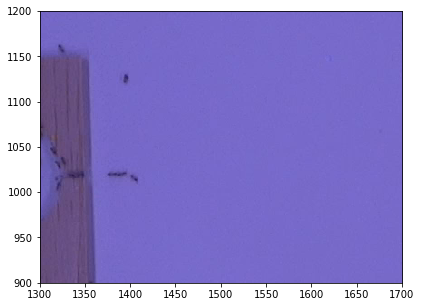

In [96]:
inFileName = '../../Dropbox (ASU)/TandemRuns/data/videos/TR-T1-001.mp4'
if not os.path.isfile(inFileName):
    print("File not found", inFileName)
    
# Read the video..    
video = pims.Video(inFileName)
selectedFrame = 120
plt.imshow(video[selectedFrame])
plt.ylim(900, 1200)
plt.xlim(1300, 1700)    

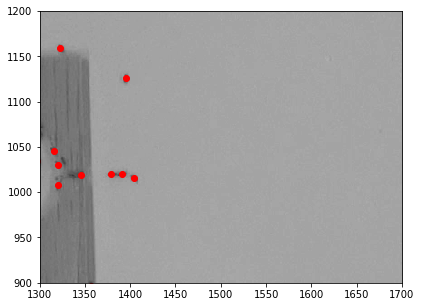

In [97]:
# Pixel size must be odd integer
gsframe = video[selectedFrame][:, :, 0] / 3 + video[selectedFrame][:, :, 1] / 3 + video[selectedFrame][:, :, 2] / 3
f = tp.locate(gsframe, diameter=11, minmass=300, invert=True,
             maxsize=3, threshold=10)

# Make a new plot
plt.figure()
plt.imshow(gsframe)
plt.ylim(900, 1200)
plt.xlim(1300, 1700)
mydata = f[['x','y']].values
plt.scatter(mydata[:, 0], mydata[:, 1], color='r')

(0, 1000)

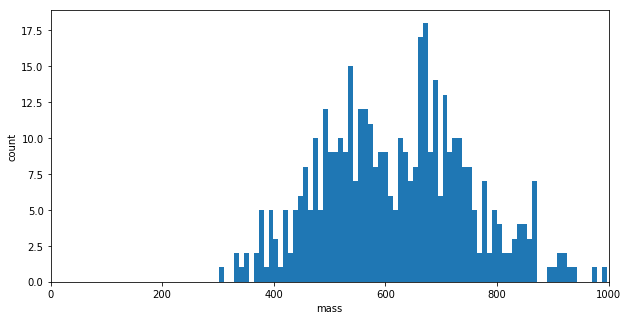

In [98]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=100)
ax.set(xlabel='mass', ylabel='count')
plt.xlim(0, 1000)

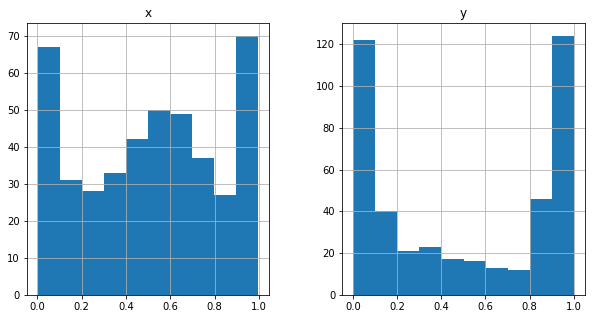

In [16]:
tp.subpx_bias(f)
plt.show()

In [99]:
from pims import pipeline

# The following function is evaluate frame by frame only when 
# necessary (lazy evaluation)
@pipeline
def as_gray(frame, invert=True):
    if (invert):
        red   = 255 - frame[:, :, 0]
        blue  = 255 - frame[:, :, 1]
        green = 255 - frame[:, :, 2]
    else:
        red   = frame[:, :, 0]
        blue  = frame[:, :, 1]
        green = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue
        
# Convert in gray scale the entire video
gsframes = as_gray(video)

In [20]:
# Locate features in a selection of frames
firstFrame = 0
lastFrame  = 5
df = tp.batch(gsframes[firstFrame:lastFrame], diameter=11, minmass=300, invert=False, maxsize=3, threshold=10, engine='python')

Frame 4: 424 features


In [ ]:
%timeit df = tp.batch(gsframes[firstFrame:lastFrame], diameter=11, minmass=300, invert=False, maxsize=3, threshold=10, engine='numba')

In [21]:
dfLink = tp.link_df(df, 10, memory=5)
print('Before:', dfLink['particle'].nunique())

# Filter spurious trajectories..
dfLink = tp.filter_stubs(dfLink, 20)
print('After:', dfLink['particle'].nunique())

Frame 4: 424 trajectories present.
Before: 567
After: 0


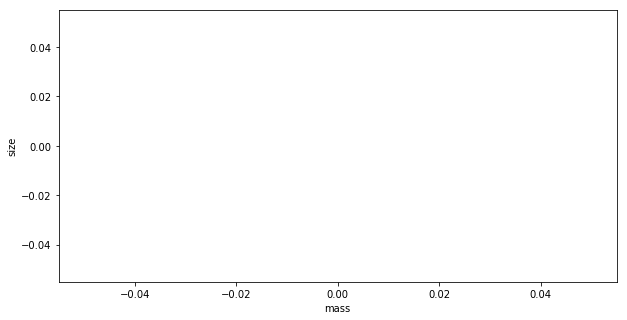

In [22]:
plt.figure()
tp.mass_size(dfLink.groupby('particle').mean())

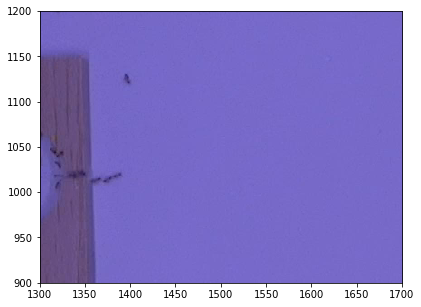

In [23]:
# Make a new plot
plt.figure()
plt.imshow(video[firstFrame])
plt.ylim(900, 1200)
plt.xlim(1300, 1700)
mydata = dfLink[dfLink['frame'] == firstFrame]
mydata = mydata[['x', 'y']].values
plt.scatter(mydata[:, 0], mydata[:, 1], color='r')

ValueError: DataFrame of trajectories is empty.

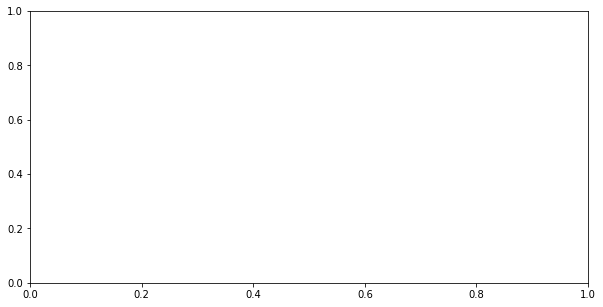

In [24]:
plt.figure()
tp.plot_traj(dfLink)

In [25]:
drift = tp.compute_drift(dfLink)
drift.plot()
plt.show()

/usr/local/lib/python2.7/site-packages/trackpy/motion.py:289: FutureWarning: 'frame' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  dx = f_diff.loc[mask, pos_columns + ['frame']].groupby('frame').mean()


TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
dfLinkD = tp.subtract_drift(dfLink.copy(), drift)

In [ ]:
ax = tp.plot_traj(dfLinkD)
plt.show()

In [255]:
import yaml
import errno
import os
from docopt import docopt

doc = '''
Usage:
    betrack -h | --help
    betrack --version
    betrack track-particles -c <file> | --configuration=<file>
    betrack annotate-video

Options:
    -h --help                            Show help screen.
    --version                            Show betrack version.
    -c <file> --configuration=<file>     Specify a yml configuration file.
'''


argv = ['--configuration', '../examples/ex-trackparticles.yml']
options = docopt(doc, argv)
filename  = options['--configuration']
filename2 = 'bla' 

if os.path.isfile(filename):
    # Open yml file..
    filename = os.path.abspath(filename)        
    with open(filename, 'r') as f:
        config = yaml.safe_load(f)
    
    # Parse tracker configuration..
    
    # Parse jobs..    
    print(len(config['jobs']))
    
else:
    # Raise exception
    raise IOError(errno.ENOENT, 'file not found', filename)
    
src = config['features-dark']

config.get('features-dark')


5


True

In [277]:
frame_uint8 = video[0]
print(frame_uint8.dtype, frame_uint8.shape)
red   = frame_uint8[:, :, 0]
blue  = frame_uint8[:, :, 1]
green = frame_uint8[:, :, 2]

frame_float = 0.2125 * red + 0.7154 * green + 0.0721 * blue
print(frame_float.dtype, frame_float.shape)
frame = frame_float.astype(frame_uint8.dtype)
print(frame.dtype, frame.shape)

uint8 (2160, 3840, 3)
float64 (2160, 3840)
uint8 (2160, 3840)


In [396]:
from tempfile import NamedTemporaryFile
from betrack.utils.parser import *

from os.path import dirname, abspath

cf = NamedTemporaryFile(mode='w+r', suffix='.yml')
cf.write('test_open_configuration: True')
cf.seek(0)
config = open_configuration(cf.name)
config = {'test-parse-file': cf.name}
print(cf.name)
print(dirname(abspath(cf.name)))

/var/folders/tf/t8685bj117x9z9qbbf2k5b_w0000gn/T/tmp9HSYxd.yml
/var/folders/tf/t8685bj117x9z9qbbf2k5b_w0000gn/T


In [83]:
from errno import ENOENT
video.frame_shape

frameshape  = (100, 100, 3)
oshape      = frameshape[0:2][::-1]
oshape

(100, 100)

In [119]:
video.pixel_type = 'uint16'


AttributeError: can't set attribute